# Bar Graphs
## Instructions

<ul>
    <li>Create a horizontal stacked bar chart</li>
    <li>Transform 1 into “Yes” and 0 into “No</li>
    <li>Follow the plot specification for bar plot</li>
</ul>

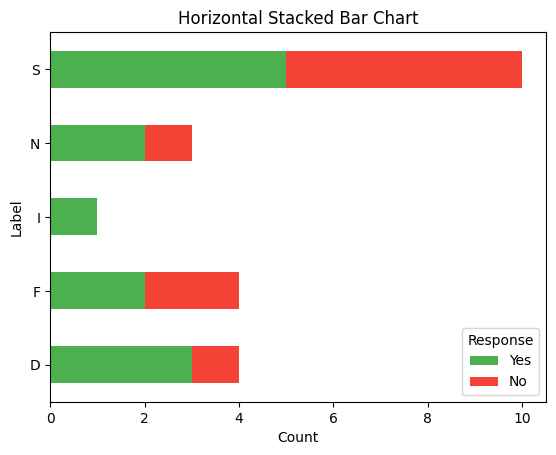

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
bar_df = pd.read_csv('sources/bar_assignment.csv')
bar_df['Response'] = bar_df['COUNT'].map({1: 'Yes', 0: 'No'})

# Aggregate counts
counts = bar_df.groupby(['LABEL', 'Response']).size().unstack().fillna(0)

# Plot
colors = {'Yes': '#4CAF50', 'No': '#F44336'}
counts[['Yes', 'No']].plot(kind='barh', stacked=True, color=colors)
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Horizontal Stacked Bar Chart')
plt.legend(title='Response')
plt.show()

# Sankey Diagram
## Instructions
<ul>
<li>Create a Sankey Diagram that connects <strong>('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS')</strong> to the <strong>LABELS</strong> <strong>('Reg', 'Aca', 'Oth')</strong> </li>
<li>Follow the Path Specifications</li>
</ul>

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Load data
sankey_df = pd.read_csv('sources/sankey_assignment.csv').set_index('LABEL')

# Nodes
sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
labels = ['D', 'F', 'I', 'N', 'S']
targets = ['Reg', 'Aca', 'Oth']
all_nodes = sources + labels + targets
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Links
links = []
# Sources to Labels
for source in sources:
    for label in labels:
        value = sankey_df.loc[label, source]
        if value > 0:
            links.append({
                'source': node_indices[source],
                'target': node_indices[label],
                'value': value
            })
# Labels to Targets
for label in labels:
    for target in targets:
        value = sankey_df.loc[label, target]
        if value > 0:
            links.append({
                'source': node_indices[label],
                'target': node_indices[target],
                'value': value
            })

# Plot
fig = go.Figure(go.Sankey(
    node=dict(pad=15, thickness=20, label=all_nodes),
    link=dict(
        source=[l['source'] for l in links],
        target=[l['target'] for l in links],
        value=[l['value'] for l in links]
    )
))
fig.update_layout(title_text="Sankey Diagram")
fig.show()

# Network Graph

## Instructions
<ul>
    <li>Create the network graph</li>
    <li><strong>D,F,I,N,S</strong> should created as a pentagram located at the center of the graph showing connection with each other.</li>
    <li>The others should be outside of the the pentagram, still showing connections to other nodes.</li>
    <li>The node color should be:
        <ul>
            <li><strong>Blue:</strong> [D,F,I,N,S]</li>
            <li><strong>Green:</strong> ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA’]</li>
            <li><strong>Yellow:</strong> ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']</li>            
        </ul>
    </li>
</ul>

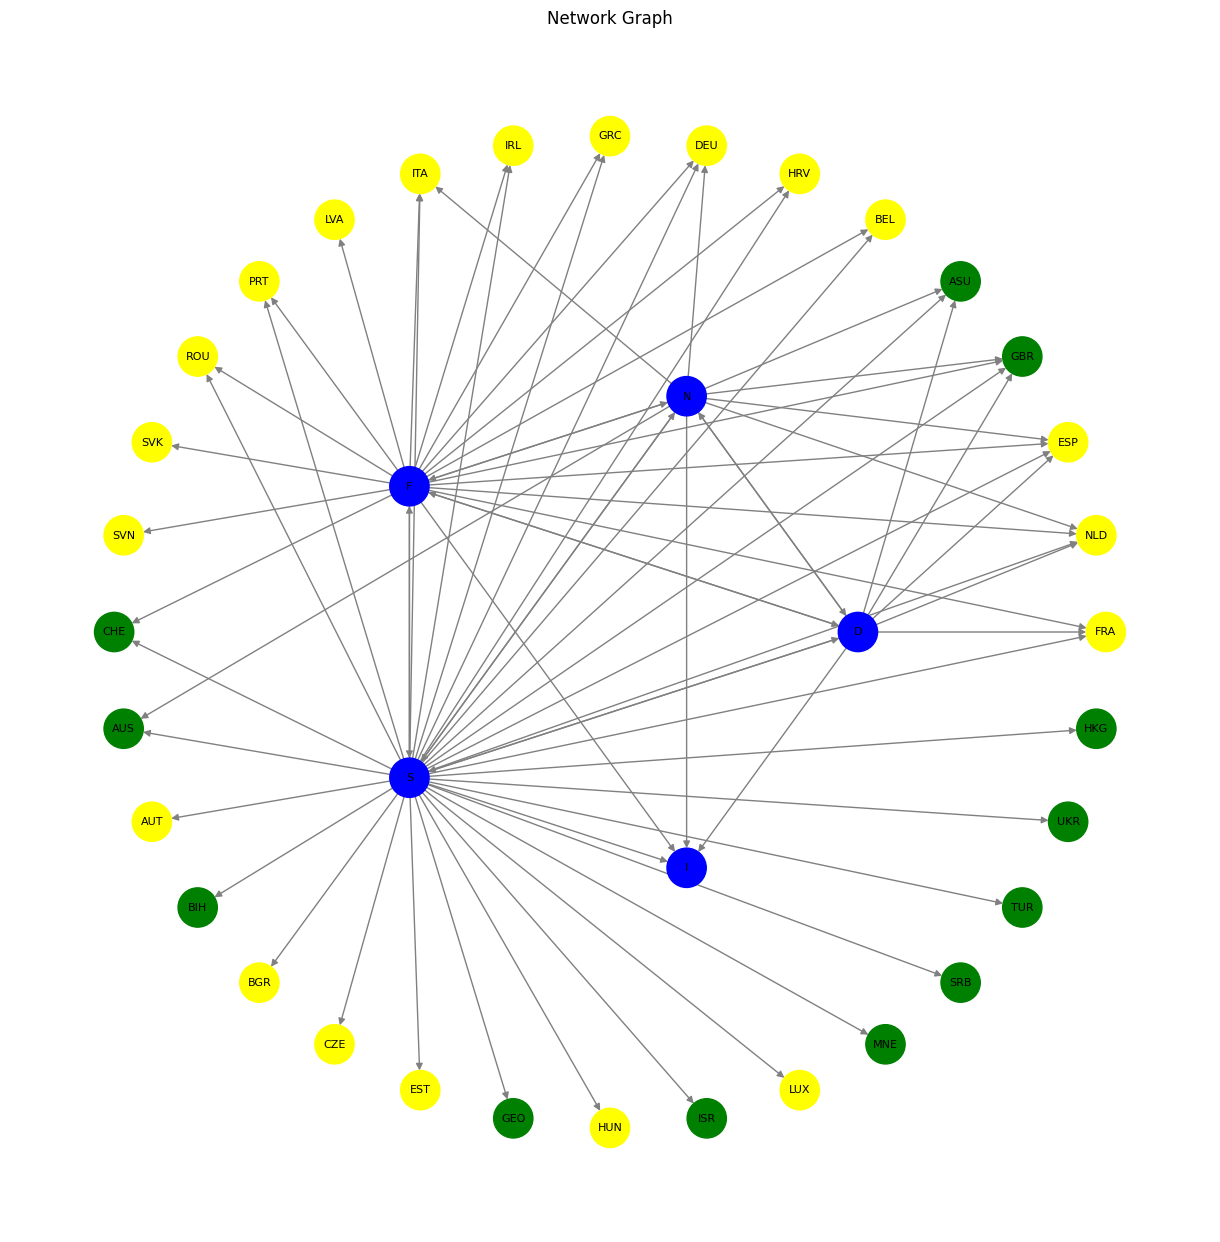

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load data
network_df = pd.read_csv('sources/networks_assignment.to_csv.csv')
nodes = network_df['LABELS'].tolist() + network_df.columns[1:].tolist()
G = nx.DiGraph()

# Add edges
for _, row in network_df.iterrows():
    src = row['LABELS']
    for col in network_df.columns[1:]:
        if row[col] > 0:
            G.add_edge(src, col, weight=row[col])

# Node colors
green = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
yellow = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
node_colors = []
for node in G.nodes():
    if node in ['D', 'F', 'I', 'N', 'S']:
        node_colors.append('blue')
    elif node in green:
        node_colors.append('green')
    elif node in yellow:
        node_colors.append('yellow')
    else:
        node_colors.append('gray')  # Fallback

# Positions
def pentagram_positions(center=(0,0), radius=1):
    angles = np.linspace(0, 2*np.pi, 5, endpoint=False)
    star_angles = []
    for i in [0, 2, 4, 1, 3]:
        star_angles.append(angles[i])
    x = center[0] + radius * np.cos(star_angles)
    y = center[1] + radius * np.sin(star_angles)
    return {label: (x[i], y[i]) for i, label in enumerate(['D', 'F', 'I', 'N', 'S'])}

pos = pentagram_positions(radius=2)
outer_nodes = [n for n in G.nodes() if n not in pos]
outer_pos = nx.circular_layout(outer_nodes, scale=4, center=(0,0))
pos.update(outer_pos)

# Plot
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=800, font_size=8, edge_color='gray')
plt.title('Network Graph')
plt.show()